## Himanshu Sharma
## DS OCT 03 Batch
### Bank Marketing Analysis : 
#### In this model we have Bank Marketing data and we have to predict if the customer will respond positively to the campaign or not, our the target variable is “respponse”

In [1]:
#import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bankmarketing.csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#check for null values
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

### Input variables:
#### bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 
	Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 
	Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
16 - response - has the client subscribed a term deposit? (binary: 'yes','no')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [5]:
# Numerical data Summaries
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Description about pdays column

In [6]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [7]:
df['pdays'].median()

-1.0

pdays -- minimum value = -1, median value = -1, mean value = 40, By this we can analyse that most of the values are -1, that means most of of the client was not previously contacted

### pdays column with only relevent values

In [8]:
dfWop = df[df['pdays']!=-1] # pdays without -1

In [9]:
print('pdays without -1 value or only with relevent values')
print('Mean value is:', dfWop['pdays'].mean())
print('Meadian value is:', dfWop['pdays'].median())
print('Mode value is:', dfWop['pdays'].mode())

pdays without -1 value or only with relevent values
Mean value is: 224.57769165556496
Meadian value is: 194.0
Mode value is: 0    182
dtype: int64


### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [10]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [11]:
df.groupby("education")['balance'].median()

education
primary      403
secondary    392
tertiary     577
unknown      568
Name: balance, dtype: int64

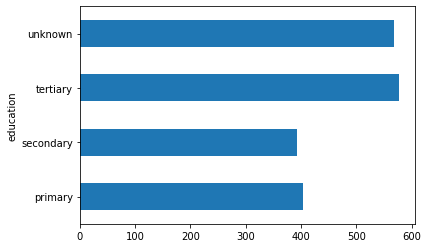

In [12]:
dataset = df.groupby("education")['balance'].median().plot(kind = "barh")

### Make a box plot for pdays. Do you see any outliers?

pdays with the value -1


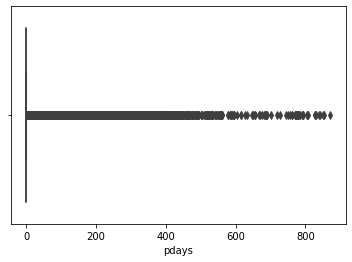

In [13]:
print("pdays with the value -1")
sns.boxplot(df['pdays'])

pdays without value -1


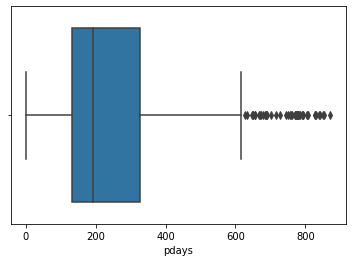

In [14]:
print("pdays without value -1")
sns.boxplot(dfWop['pdays'])

#### Yes, We can clearly see the outliers in pdays column.

### EDA 

### Convert the target variable (response) to a convenient form

In [15]:
df['response'].value_counts()

no     39922
yes     5289
Name: response, dtype: int64

In [16]:
df.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [17]:
df.tail()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0
45210,37,entrepreneur,120000,married,secondary,yes,no,2971,no,no,cellular,17,nov,361,2,188,11,other,0


### Make suitable plots for associations with numerical features and categorical features’

In [18]:
### Get categorical and numerical columns
cols = df.columns
num_cols= df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [19]:
num_cols

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'response'],
      dtype='object')

In [20]:
cat_cols

['poutcome',
 'marital',
 'contact',
 'housing',
 'job',
 'targeted',
 'default',
 'loan',
 'education',
 'month']

### Visualizing Response Feature with Categorical Features

In [21]:
# Build a function to show categorical values disribution

def plot_bar(column):
    temp = pd.DataFrame()
    #Count Categorical Values
    temp['Response_Yes'] = df[df['response'] == 1][column].value_counts()
    temp['Response_No'] = df[df['response'] == 0][column].value_counts()
    temp.plot(kind = 'bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and Response'.format(column))
    plt.show();

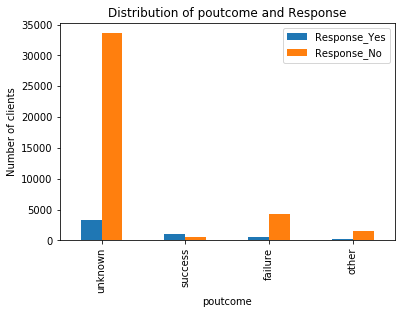

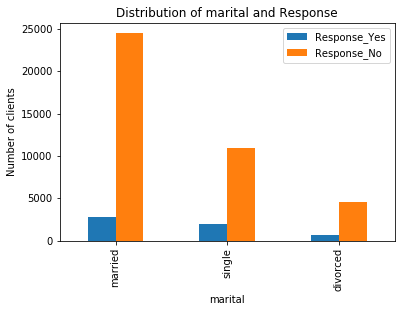

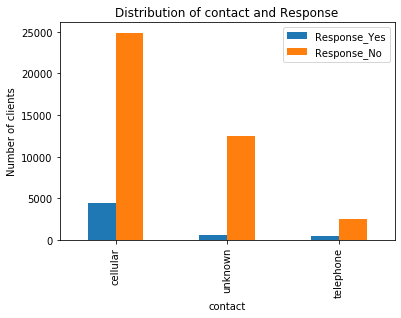

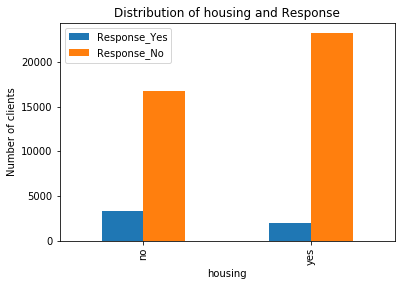

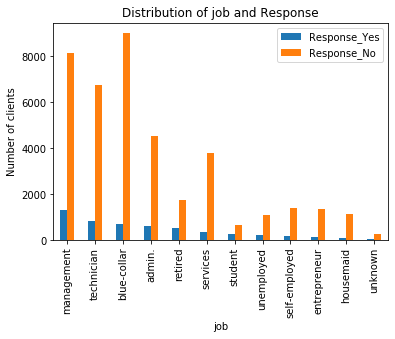

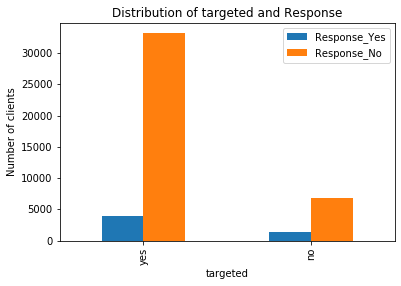

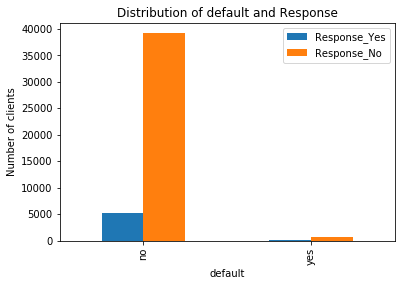

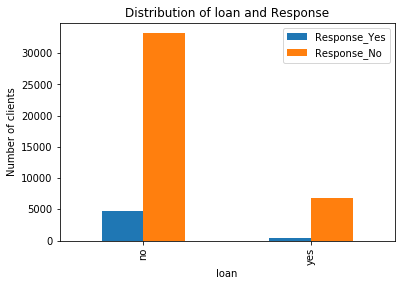

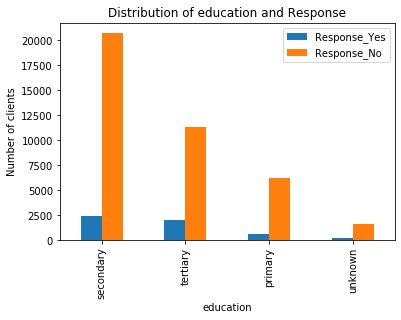

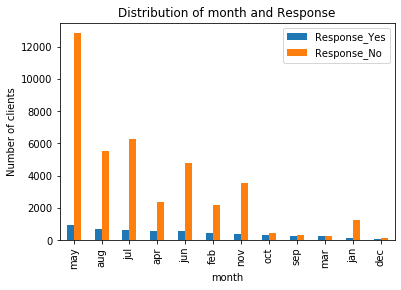

In [22]:
for i in df[cat_cols]:
    plot_bar(i)

### Visualizing Response Feature with Numerical Features

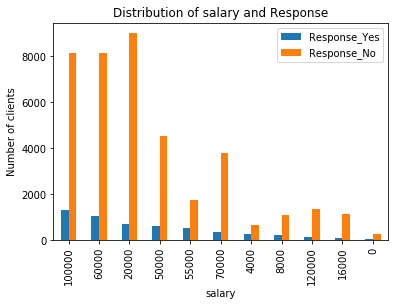

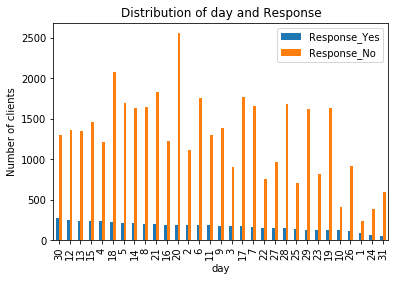

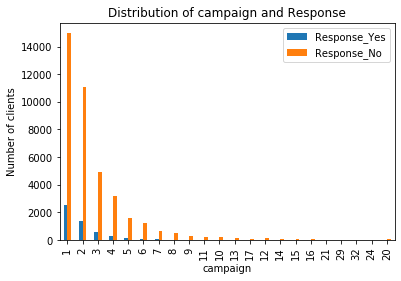

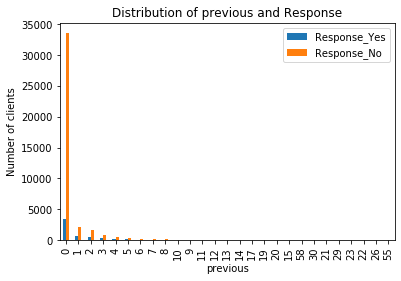

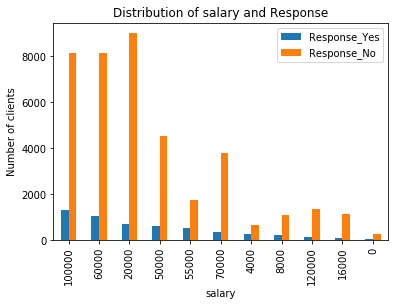

In [23]:
#for i in df[num_cols]:
    #sns.barplot(df['response'],df[i])
    #plt.show()
    
#for i in df[num_cols]:
    #plot_bar(i)

plot_bar('salary')
plot_bar('day') 
plot_bar('campaign') 
plot_bar('previous')
plot_bar('salary') 

#### Are the features about the previous campaign data useful?
No, it is not useful because we increase the number of contact in previous campaign, we get no response in current campaign.

#### Are pdays and poutcome associated with the target?
yes, they are associated with target.

#### If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

#### Percentage of 'pdays' values:

In [24]:
len (df[df['pdays'] > 400] ) / len(df) * 100

0.5175731569750724

In [25]:
len (df[df['pdays'] == -1] ) / len(df) * 100

81.73674548229414

'pdays' holds the number of days that passed by after the client was last contacted from a previous campaign, In'pdays' data we can see that:
* 81% of values are -1.
* -1 possibly means that the client wasn't contacted before or stands for missing data.

Since we are not sure exactly what -1 means I suggest to drop this column.

#### Percentage of 'previous' values:

In [26]:
len (df[df['previous'] > 20] ) / len(df) * 100

0.12165181040012386

In [27]:
len (df[df['previous'] ==0] ) / len(df) * 100

81.73674548229414

'previous' holds the number of contacts performed before this campaign and for this client (numeric) Numbers for 'previous' above 20 are also really strange and 81% of the values are 0 , so I suggest to impute them with 'Average' values or we can drop the column while data cleaning.

In [28]:
df[cat_cols]

,poutcome,marital,contact,housing,job,targeted,default,loan,education,month
0,unknown,married,unknown,yes,management,yes,no,no,tertiary,may
1,unknown,single,unknown,yes,technician,yes,no,no,secondary,may
2,unknown,married,unknown,yes,entrepreneur,yes,no,yes,secondary,may
3,unknown,married,unknown,yes,blue-collar,no,no,no,unknown,may
4,unknown,single,unknown,no,unknown,no,no,no,unknown,may
...,...,...,...,...,...,...,...,...,...,...
45206,unknown,married,cellular,no,technician,yes,no,no,tertiary,nov
45207,unknown,divorced,cellular,no,retired,yes,no,no,primary,nov
45208,success,married,cellular,no,retired,yes,no,no,secondary,nov
45209,unknown,married,telephone,no,blue-collar,yes,no,no,secondary,nov


In [29]:
df[num_cols]

,age,salary,balance,day,duration,campaign,pdays,previous,response
0,58,100000,2143,5,261,1,-1,0,0
1,44,60000,29,5,151,1,-1,0,0
2,33,120000,2,5,76,1,-1,0,0
3,47,20000,1506,5,92,1,-1,0,0
4,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0,1
45207,71,55000,1729,17,456,2,-1,0,1
45208,72,55000,5715,17,1127,5,184,3,1
45209,57,20000,668,17,508,4,-1,0,0


### The necessary transformations for the categorical variables and the numeric variables

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [31]:
le = LabelEncoder()

In [32]:
df1 = df[cat_cols].apply(le.fit_transform)

In [33]:
df1.head()

,poutcome,marital,contact,housing,job,targeted,default,loan,education,month
0,3,1,2,1,4,1,0,0,2,8
1,3,2,2,1,9,1,0,0,1,8
2,3,1,2,1,2,1,0,1,1,8
3,3,1,2,1,1,0,0,0,3,8
4,3,2,2,0,11,0,0,0,3,8


In [34]:
f_data = df1.join(df[num_cols])

In [35]:
f_data.head()

,poutcome,marital,contact,housing,job,targeted,default,loan,education,month,age,salary,balance,day,duration,campaign,pdays,previous,response
0,3,1,2,1,4,1,0,0,2,8,58,100000,2143,5,261,1,-1,0,0
1,3,2,2,1,9,1,0,0,1,8,44,60000,29,5,151,1,-1,0,0
2,3,1,2,1,2,1,0,1,1,8,33,120000,2,5,76,1,-1,0,0
3,3,1,2,1,1,0,0,0,3,8,47,20000,1506,5,92,1,-1,0,0
4,3,2,2,0,11,0,0,0,3,8,33,0,1,5,198,1,-1,0,0


In [36]:
f_data.shape

(45211, 19)

### Handle variables corresponding to the previous campaign

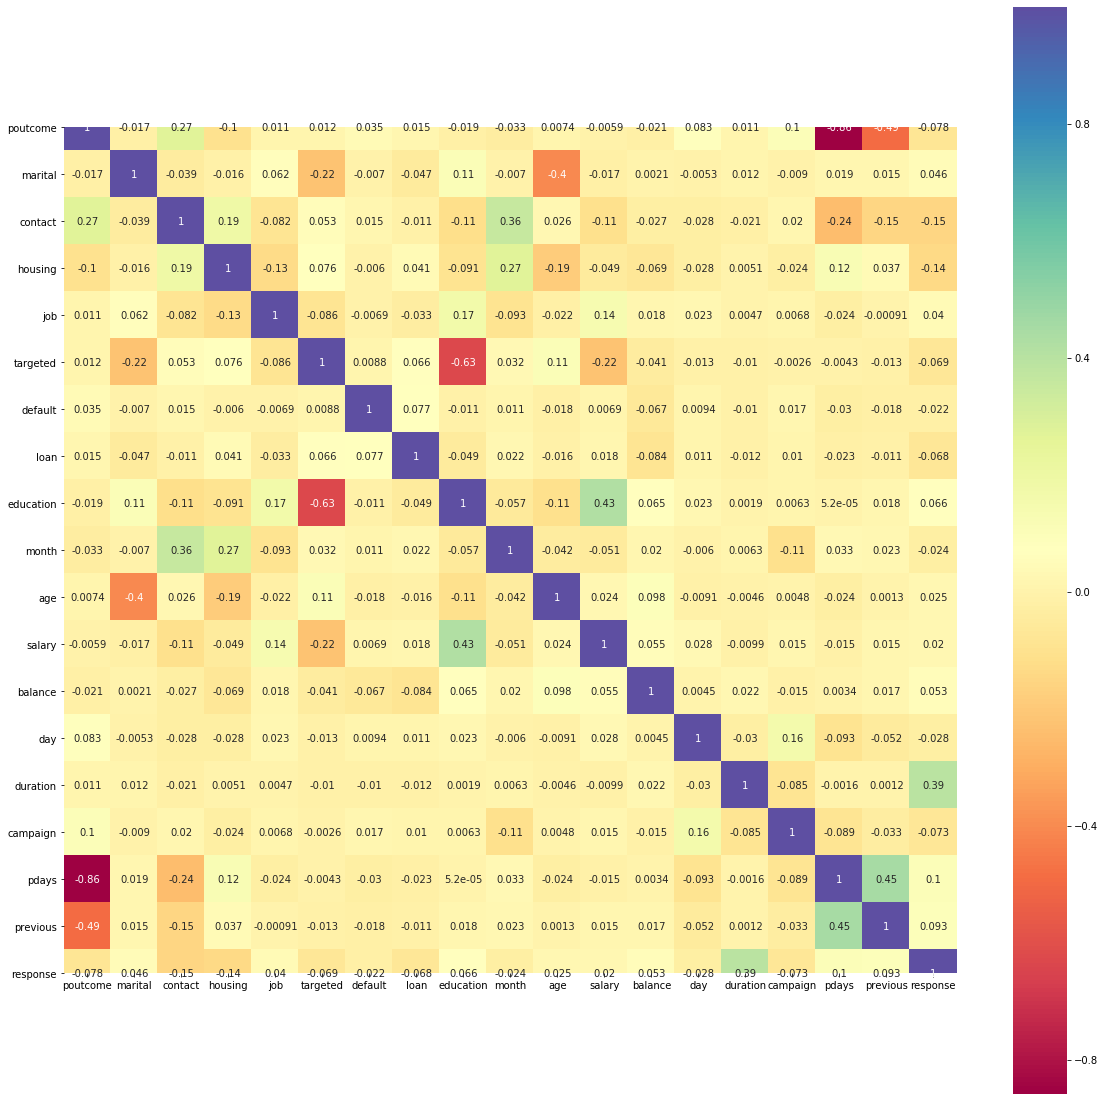

In [37]:
plt.figure(figsize =(20,20))
sns.heatmap(f_data.corr(),square = True, annot = True,cmap= 'Spectral' )

##### f_data.drop(['previous','pdays', 'campaign'], axis = 1, inplace= True)

In [38]:
f_data.drop(['pdays'], axis = 1, inplace= True)

In [39]:
f_data.head()

,poutcome,marital,contact,housing,job,targeted,default,loan,education,month,age,salary,balance,day,duration,campaign,previous,response
0,3,1,2,1,4,1,0,0,2,8,58,100000,2143,5,261,1,0,0
1,3,2,2,1,9,1,0,0,1,8,44,60000,29,5,151,1,0,0
2,3,1,2,1,2,1,0,1,1,8,33,120000,2,5,76,1,0,0
3,3,1,2,1,1,0,0,0,3,8,47,20000,1506,5,92,1,0,0
4,3,2,2,0,11,0,0,0,3,8,33,0,1,5,198,1,0,0


In [40]:
f_data.shape

(45211, 18)

In [41]:
df.shape

(45211, 19)

## Predictive modeling: 

### Train test split

In [42]:
X = f_data.drop('response', axis = 1)
X.head()

,poutcome,marital,contact,housing,job,targeted,default,loan,education,month,age,salary,balance,day,duration,campaign,previous
0,3,1,2,1,4,1,0,0,2,8,58,100000,2143,5,261,1,0
1,3,2,2,1,9,1,0,0,1,8,44,60000,29,5,151,1,0
2,3,1,2,1,2,1,0,1,1,8,33,120000,2,5,76,1,0
3,3,1,2,1,1,0,0,0,3,8,47,20000,1506,5,92,1,0
4,3,2,2,0,11,0,0,0,3,8,33,0,1,5,198,1,0


In [43]:
y = f_data[['response']]
y.head()

,response
0,0
1,0
2,0
3,0
4,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101,stratify = y)

### Predictive model 1: Logistic regression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lr.classes_

array([0, 1], dtype=int64)

In [48]:
lr.coef_

array([[-2.18842592e-01, -9.90545957e-02, -2.58712081e-01,
        -2.62416339e-01,  1.66443148e-03, -1.36749440e-01,
        -7.28835875e-03, -7.86892058e-02,  2.96176287e-02,
        -9.72072613e-02, -1.87728021e-02, -3.14730731e-06,
         3.00790592e-05, -1.34370241e-02,  3.52547539e-03,
        -2.08131501e-01,  4.87457244e-02]])

In [49]:
y_pred =lr.predict(X_test)

In [50]:
print('Report:\n',classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_pred,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.53      0.17      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.72      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564

F1 Score: 0.2595419847328244
confusion Matrix:
 [[11740  1315]
 [  237   272]]
cross validation: [0.90025434 0.89693686 0.88453882 0.85091794 0.86163035]


In [51]:
accuracy_score(y_test,y_pred)

0.885579475081097

#### Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [52]:
from sklearn.feature_selection import RFE
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [53]:
print(X_train.columns[rfe.support_])

Index(['poutcome', 'marital', 'contact', 'housing', 'job', 'targeted',
       'default', 'loan', 'education', 'month', 'age', 'day', 'duration',
       'campaign', 'previous'],
      dtype='object')


In [54]:
print(X_train.columns[rfe.support_])

Index(['poutcome', 'marital', 'contact', 'housing', 'job', 'targeted',
       'default', 'loan', 'education', 'month', 'age', 'day', 'duration',
       'campaign', 'previous'],
      dtype='object')


In [55]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1])

In [56]:
cols = X_train.columns[rfe.support_]
cols

Index(['poutcome', 'marital', 'contact', 'housing', 'job', 'targeted',
       'default', 'loan', 'education', 'month', 'age', 'day', 'duration',
       'campaign', 'previous'],
      dtype='object')

In [57]:
import statsmodels.api as sm

In [58]:
log1 = sm.GLM(y_train,(sm.add_constant(X_train[cols])), family = sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31631
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8475.9
Date:                Fri, 10 Apr 2020   Deviance:                       16952.
Time:                        16:34:38   Pearson chi2:                 2.26e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5737      0.177    -14.520      0.000      -2.921      -2.226
poutcome      -0.0840      0.023     -3.724      0.000      -0.128      -0.040
marital        0.1577      0.037      4.222      0.000       0.085       0.231
contact       -0.6373      0.032    -19.894      0.000      -0.700      -0.575
housing       -1.0320      0.045    -22.857      0.000      -1.120      -0.944
job            0.0134      0.006      2.087      0.037       0.001       0.026
targeted      -0.2420      0.064     -3.764      0.000      -0.368      -0.116
default       -0.3475      0.181     -1.917      0.055      -0.703       0.008
loan          -0.7182      0.068    -10.589      0.000      -0.851      -0.585
education      0.1215      0.036      3.407      0.001       0.052       0.191
month          0.0373      0.007      5.619      0.000       0.024       0.050
age            0.0057      0.002      2.902      0.004       0.002       0.010
day           -0.0068      0.002     -2.767      0.006      -0.012      -0.002
duration       0.0040   7.33e-05     54.398      0.000       0.004       0.004
campaign      -0.1487      0.012    -11.902      0.000      -0.173      -0.124
previous       0.0858      0.009      9.059      0.000       0.067       0.104
==============================================================================
"""

#### the rfe has selected features but some featues are high value but just build a model

In [59]:
lr.fit(X_train[cols],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
lr.classes_

array([0, 1], dtype=int64)

In [61]:
lr.coef_

array([[-0.08932108,  0.13099294, -0.64569801, -1.0297175 ,  0.01259238,
        -0.26951626, -0.33735725, -0.74766503,  0.10661283,  0.03637881,
         0.004499  , -0.00721933,  0.00397957, -0.14963458,  0.08390694]])

In [62]:
y_pred2 = lr.predict(X_test[cols])

In [63]:
print('Report:\n',classification_report(y_test, y_pred2))
print("F1 Score:",f1_score(y_pred2,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))
print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))
print("Acurracy :",accuracy_score(y_pred2,y_test))

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.57      0.20      0.30      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564

F1 Score: 0.2970574497898178
confusion Matrix:
 [[11741  1269]
 [  236   318]]
kfold cross validation:
 [0.90025434 0.89693686 0.88453882 0.85091794 0.86163035]
Acurracy : 0.8890445296372751


#### Some feature has higher p value so lets check with another approach ie.. vif

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 25)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,12.104598
0,poutcome,9.563063
5,targeted,7.259004
8,education,5.990685
9,month,5.213164
11,salary,5.150444
13,day,4.630684
1,marital,4.313353
4,job,2.893504
3,housing,2.474475


#### After looking to the various factors such as vif, lets take features manually and build a model

In [66]:
#F_cols = ['education', 'poutcome', 'marital', 'month','targeted', 'age', 'salary','day']

In [67]:
F_cols = ['education', 'job', 'poutcome', 'marital', 'month','targeted', 'housing', 'age', 'salary','day','duration']

In [68]:
log = sm.GLM(y_train,(sm.add_constant(X_train[F_cols])), family = sm.families.Binomial())
log.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                31647
Model:                            GLM   Df Residuals:                    31635
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8905.3
Date:                Fri, 10 Apr 2020   Deviance:                       17811.
Time:                        16:34:44   Pearson chi2:                 4.19e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3407      0.170    -13.768      0.000      -2.674      -2.008
education      0.1723      0.037      4.684      0.000       0.100       0.244
job            0.0208      0.006      3.317      0.001       0.009       0.033
poutcome      -0.3332      0.018    -18.510      0.000      -0.369      -0.298
marital        0.1877      0.037      5.098      0.000       0.116       0.260
month          0.0092      0.007      1.416      0.157      -0.004       0.022
targeted      -0.2442      0.064     -3.820      0.000      -0.370      -0.119
housing       -1.1654      0.044    -26.291      0.000      -1.252      -1.079
age            0.0041      0.002      2.099      0.036       0.000       0.008
salary     -7.667e-07   6.58e-07     -1.165      0.244   -2.06e-06    5.23e-07
day           -0.0093      0.002     -3.920      0.000      -0.014      -0.005
duration       0.0039   7.06e-05     54.937      0.000       0.004       0.004
==============================================================================
"""

In [69]:
lr.fit(X_train[F_cols],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
lr.classes_

array([0, 1], dtype=int64)

In [71]:
lr.coef_

array([[ 7.05434139e-03, -3.81207486e-03, -1.26504527e-01,
        -3.99876197e-02, -9.99244831e-02, -4.49537185e-02,
        -7.97594352e-02, -3.39168621e-02, -4.15486797e-06,
        -2.49401515e-02,  3.22954933e-03]])

In [72]:
predf = lr.predict(X_test[F_cols])

In [73]:
def LR_matric():    
    print('Report:\n',classification_report(y_test,predf ))
    print("F1 Score:",f1_score(predf,y_test))
    print('confusion Matrix:\n',confusion_matrix(predf,y_test))
    print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))
    print("Acurracy :",accuracy_score(predf,y_test))

In [74]:
LR_matric()

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.53      0.14      0.23      1587

    accuracy                           0.88     13564
   macro avg       0.71      0.56      0.58     13564
weighted avg       0.85      0.88      0.85     13564

F1 Score: 0.22662048490846118
confusion Matrix:
 [[11772  1358]
 [  205   229]]
kfold cross validation:
 [0.90025434 0.89693686 0.88453882 0.85091794 0.86163035]
Acurracy : 0.8847685048658213


In [75]:
print("Important Features are :", F_cols)

Important Features are : ['education', 'job', 'poutcome', 'marital', 'month', 'targeted', 'housing', 'age', 'salary', 'day', 'duration']


## Predictive model 2: Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
y_pred1 = rfc.predict(X_test)

In [78]:
def RF_matric():    
    print('Report:\n',classification_report(y_test, y_pred1))
    print("F1 Score:",f1_score(y_pred1,y_test))
    print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))
    print('cross validation:',cross_val_score(rfc, X, y, cv=5))
    print("Acurracy :",accuracy_score(y_pred,y_test))

In [79]:
RF_matric()

Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.62      0.40      0.49      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

F1 Score: 0.48926380368098155
confusion Matrix:
 [[11594   949]
 [  383   638]]
cross validation: [0.88377751 0.79785469 0.77847821 0.62762663 0.46974892]
Acurracy : 0.885579475081097


### Using the feature importance values from the Random Forest module, identify the most important features for the model

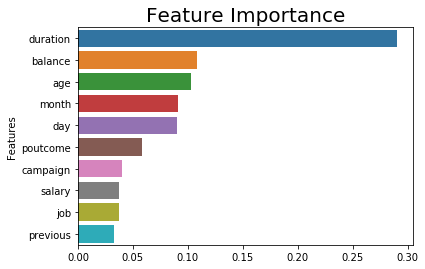

In [80]:
importances=rfc.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

### Compare the performance of the Random Forest and the logistic model –

#### I select the F1 Score and Confustion Matrix for the Final comparision of both Models because the Target Variable has binary output and these matrix give us the better clarification.

In [82]:
print ('Random Forest :\n')
RF_matric()
print('Logistic Regression :\n')
LR_matric()

Random Forest :

Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     11977
           1       0.62      0.40      0.49      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

F1 Score: 0.48926380368098155
confusion Matrix:
 [[11594   949]
 [  383   638]]
cross validation: [0.884441   0.80139334 0.77416501 0.61103738 0.51808428]
Acurracy : 0.885579475081097
Logistic Regression :

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.53      0.14      0.23      1587

    accuracy                           0.88     13564
   macro avg       0.71      0.56      0.58     13564
weighted avg       0.85      0.88      0.85     13564

F1 Score: 0.22662048490846118
confusion Matrix:
 [[11772  1358]
 [  205   229]]
kfold cross validation:


### Which model has better performance on the test set?

* According to the precisio, recall, f1-score we can say that the Random Forest work better in this model 

### Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

* Not All the features are similar but some are comman in both feature selection model.